# Express sklearn pipeline as codeflare pipeline

Reference: https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py


In [1]:
%matplotlib inline


# Pipelining: chaining a PCA and a logistic regression

The PCA does an unsupervised dimensionality reduction, while the logistic
regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA


Automatically created module for IPython interactive environment
Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


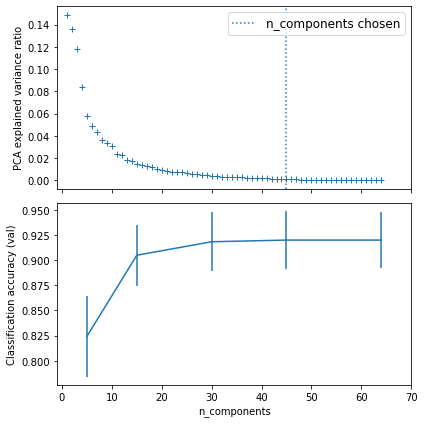

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [ ]:
print(__doc__)

ray.shutdown()
ray.init()

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# Modified for codeflare pipeline by Yuan-Chi Chang
# License: Same as original code creator


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca_5 = PCA(n_components=5)
pca_15 = PCA(n_components=15)
pca_30 = PCA(n_components=30)
pca_45 = PCA(n_components=45)
pca_64 = PCA(n_components=64)

# set the tolerance to a large value to make the example faster
logistic_1 = LogisticRegression(max_iter=10000, tol=0.1, C=1.00000000e-04)
logistic_2 = LogisticRegression(max_iter=10000, tol=0.1, C=4.64158883e-02)
logistic_3 = LogisticRegression(max_iter=10000, tol=0.1, C=2.15443469e+01)
logistic_4 = LogisticRegression(max_iter=10000, tol=0.1, C=1.00000000e+04)

## initialize codeflare pipeline by first creating the nodes
pipeline = dm.Pipeline()
node_pca_5 = dm.EstimatorNode('pca_5', pca_5)
node_pca_15 = dm.EstimatorNode('pca_15', pca_15)
node_pca_30 = dm.EstimatorNode('pca_30', pca_30)
node_pca_45 = dm.EstimatorNode('pca_45', pca_45)
node_pca_64 = dm.EstimatorNode('pca_64', pca_64)

node_logistic_1 = dm.EstimatorNode('logistic_1', logistic_1)
node_logistic_2 = dm.EstimatorNode('logistic_2', logistic_2)
node_logistic_3 = dm.EstimatorNode('logistic_3', logistic_3)
node_logistic_4 = dm.EstimatorNode('logistic_4', logistic_4)

## codeflare nodes are then connected by edges
pipeline.add_edge(node_pca_5, node_logistic_1)
pipeline.add_edge(node_pca_15, node_logistic_1)
pipeline.add_edge(node_pca_30, node_logistic_1)
pipeline.add_edge(node_pca_45, node_logistic_1)
pipeline.add_edge(node_pca_64, node_logistic_1)

pipeline.add_edge(node_pca_5, node_logistic_2)
pipeline.add_edge(node_pca_15, node_logistic_2)
pipeline.add_edge(node_pca_30, node_logistic_2)
pipeline.add_edge(node_pca_45, node_logistic_2)
pipeline.add_edge(node_pca_64, node_logistic_2)

pipeline.add_edge(node_pca_5, node_logistic_3)
pipeline.add_edge(node_pca_15, node_logistic_3)
pipeline.add_edge(node_pca_30, node_logistic_3)
pipeline.add_edge(node_pca_45, node_logistic_3)
pipeline.add_edge(node_pca_64, node_logistic_3)

pipeline.add_edge(node_pca_5, node_logistic_4)
pipeline.add_edge(node_pca_15, node_logistic_4)
pipeline.add_edge(node_pca_30, node_logistic_4)
pipeline.add_edge(node_pca_45, node_logistic_4)
pipeline.add_edge(node_pca_64, node_logistic_4)

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# execute FIT
pipeline_input = dm.PipelineInput()
xy = dm.Xy(X_digits, y_digits)
pipeline_input.add_xy_arg(node_pca_5, xy)
pipeline_input.add_xy_arg(node_pca_15, xy)
pipeline_input.add_xy_arg(node_pca_30, xy)
pipeline_input.add_xy_arg(node_pca_45, xy)
pipeline_input.add_xy_arg(node_pca_64, xy)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

ray.shutdown()

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [3]:
np.logspace(-4, 4, 4)

array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])